The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined. The aim is to build a predictive model and find out the sales of each product at a particular store.
Using this model, BigMart will try to understand the properties of products and stores which play a key role in increasing sales.
 

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Load train and test dataset

In [3]:
train=pd.read_csv('...../train.csv')
test=pd.read_csv('....../test.csv')

In [4]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [5]:
train.shape

(8523, 12)

In [6]:
test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [7]:
test.shape

(5681, 11)

### Relationship between item MRP and item outlet sales

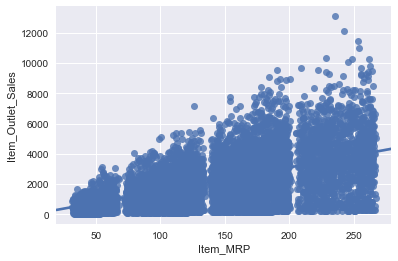

In [8]:
sns.regplot(x='Item_MRP', y='Item_Outlet_Sales', data=train)

In [9]:
from sklearn.pipeline import Pipeline
from sklearn.cross_validation import train_test_split
from sklearn.grid_search import GridSearchCV
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.preprocessing import PolynomialFeatures, StandardScaler

from sklearn.metrics import mean_squared_error

/anaconda/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/anaconda/lib/python3.6/site-packages/sklearn/grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [10]:
X_train, X_test, y_train, y_test = train_test_split(train[['Item_MRP', 'Item_Visibility', 'Outlet_Establishment_Year']], train.Item_Outlet_Sales, test_size=0.2, random_state=44)

In [11]:
polynomial_features = PolynomialFeatures()
scaler = StandardScaler()
ridge = Ridge()

param_grid_pipeline = {'ridge__alpha': 10. ** np.arange(-2, 2), 'poly__degree': [2, 3, 4]}
linear_pipe = Pipeline([('scaler', scaler), ('poly', polynomial_features), ('ridge', ridge)])

grid = GridSearchCV(linear_pipe, param_grid=param_grid_pipeline, cv=5, scoring='mean_squared_error')

In [12]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 

In [13]:
grid.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=Pipeline(steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('poly', PolynomialFeatures(degree=2, include_bias=True, interaction_only=False)), ('ridge', Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001))]),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'ridge__alpha': array([  0.01,   0.1 ,   1.  ,  10.  ]), 'poly__degree': [2, 3, 4]},
       pre_dispatch='2*n_jobs', refit=True, scoring='mean_squared_error',
       verbose=0)

In [14]:
grid.best_params_

{'poly__degree': 4, 'ridge__alpha': 10.0}

In [15]:
est = grid.best_estimator_
est.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('poly', PolynomialFeatures(degree=4, include_bias=True, interaction_only=False)), ('ridge', Ridge(alpha=10.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001))])

In [16]:
predsTrain = est.predict(X_train)
predsTest = est.predict(X_test)

In [17]:
np.sqrt(mean_squared_error(y_train, predsTrain))

1348.774680386718

In [18]:
np.sqrt(mean_squared_error(y_test, predsTest))

1281.2176873291507

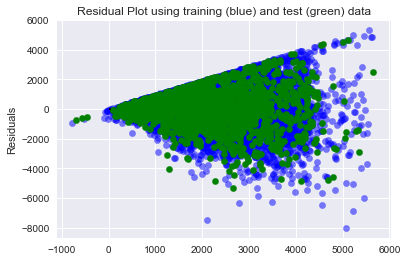

In [19]:
plt.scatter(predsTrain, predsTrain - y_train, c='b', s=40, alpha=0.5)
plt.scatter(predsTest, predsTest - y_test, c='g', s=40)
plt.hlines(y = 0, xmin=0, xmax = 50)
plt.title('Residual Plot using training (blue) and test (green) data')
plt.ylabel('Residuals')

In [20]:
est.fit(train[['Item_MRP', 'Item_Visibility', 'Outlet_Establishment_Year']], train.Item_Outlet_Sales)

Pipeline(steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('poly', PolynomialFeatures(degree=4, include_bias=True, interaction_only=False)), ('ridge', Ridge(alpha=10.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001))])

In [21]:
predictions = est.predict(test[['Item_MRP', 'Item_Visibility', 'Outlet_Establishment_Year']])

### Concatenate the two dataset train and test for further analysis

In [22]:
data=pd.concat([train,test],ignore_index=True)
data.shape

(14204, 12)

In [23]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Item_MRP,14204.0,141.004977,62.086938,31.290,94.012000,142.247000,185.855600,266.888400
Item_Outlet_Sales,8523.0,2181.288914,1706.499616,33.290,834.247400,1794.331000,3101.296400,13086.964800
Item_Visibility,14204.0,0.065953,0.051459,0.000,0.027036,0.054021,0.094037,0.328391
Item_Weight,11765.0,12.792854,4.652502,4.555,8.710000,12.600000,16.750000,21.350000
Outlet_Establishment_Year,14204.0,1997.830681,8.371664,1985.000,1987.000000,1999.000000,2004.000000,2009.000000


### Find the count of distinct values in each column

In [24]:
data.apply(lambda x: len(x.unique()))

Item_Fat_Content                 5
Item_Identifier               1559
Item_MRP                      8052
Item_Outlet_Sales             3494
Item_Type                       16
Item_Visibility              13006
Item_Weight                    416
Outlet_Establishment_Year        9
Outlet_Identifier               10
Outlet_Location_Type             3
Outlet_Size                      4
Outlet_Type                      4
dtype: int64

In [25]:
data.dtypes

Item_Fat_Content              object
Item_Identifier               object
Item_MRP                     float64
Item_Outlet_Sales            float64
Item_Type                     object
Item_Visibility              float64
Item_Weight                  float64
Outlet_Establishment_Year      int64
Outlet_Identifier             object
Outlet_Location_Type          object
Outlet_Size                   object
Outlet_Type                   object
dtype: object

### Filter categorical variables in column Item_Fat_Content, Item_Type, Outlet_Location_Type, Outlet_Size and Outlet_Type

In [26]:
categorical_columns=[x for x in data.dtypes.index if data.dtypes[x]== 'object']
categorical_columns=[x for x in categorical_columns if x not in ['Item_Identifier','Outlet_Identifier','source']]

for col in categorical_columns:
    print(data[col].value_counts())

Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: Item_Fat_Content, dtype: int64
Fruits and Vegetables    2013
Snack Foods              1989
Household                1548
Frozen Foods             1426
Dairy                    1136
Baking Goods             1086
Canned                   1084
Health and Hygiene        858
Meat                      736
Soft Drinks               726
Breads                    416
Hard Drinks               362
Others                    280
Starchy Foods             269
Breakfast                 186
Seafood                    89
Name: Item_Type, dtype: int64
Tier 3    5583
Tier 2    4641
Tier 1    3980
Name: Outlet_Location_Type, dtype: int64
Medium    4655
Small     3980
High      1553
Name: Outlet_Size, dtype: int64
Supermarket Type1    9294
Grocery Store        1805
Supermarket Type3    1559
Supermarket Type2    1546
Name: Outlet_Type, dtype: int64


In [27]:
item_avg_wt=data.pivot_table(values='Item_Weight',index='Item_Identifier')
print(item_avg_wt)

miss_bool=data['Item_Weight'].isnull()

data.loc[miss_bool,'Item_Weight']=data.loc[miss_bool,'Item_Identifier'].apply(lambda x : item_avg_wt[x])



                 Item_Weight
Item_Identifier             
DRA12                 11.600
DRA24                 19.350
DRA59                  8.270
DRB01                  7.390
DRB13                  6.115
DRB24                  8.785
DRB25                 12.300
DRB48                 16.750
DRC01                  5.920
DRC12                 17.850
DRC13                  8.260
DRC24                 17.850
DRC25                  5.730
DRC27                 13.800
DRC36                 13.000
DRC49                  8.670
DRD01                 12.100
DRD12                  6.960
DRD13                 15.000
DRD15                 10.600
DRD24                 13.850
DRD25                  6.135
DRD27                 18.750
DRD37                  9.800
DRD49                  9.895
DRD60                 15.700
DRE01                 10.100
DRE03                 19.600
DRE12                  4.590
DRE13                  6.280
...                      ...
NCX05                 15.200
NCX06         

KeyError: 'FDP10'

In [28]:
visibility_avg=data.pivot_table(values='Item_Visibility',index='Item_Identifier')

In [29]:
#capturing initial two characters of string and separating the data 
data['Item_Type_Combined']=data['Item_Identifier'].apply(lambda x:x[0:2])
#Renaming them to more intuitive categories.
data['Item_Type_Combined']=data['Item_Type_Combined'].map({'FD':'Food',
                                                            'NC':'Non-Consumable',
                                                            'DR':'Drinks'})

data['Item_Type_Combined'].value_counts()

Food              10201
Non-Consumable     2686
Drinks             1317
Name: Item_Type_Combined, dtype: int64

In [30]:
data['Outlet_Years']=2013-data['Outlet_Establishment_Year']
data['Outlet_Years'].describe()

count    14204.000000
mean        15.169319
std          8.371664
min          4.000000
25%          9.000000
50%         14.000000
75%         26.000000
max         28.000000
Name: Outlet_Years, dtype: float64

In [31]:
print('Original Categories :')
print(data['Item_Fat_Content'].value_counts())

print('\n Modified Categories :')
data['Item_Fat_Content']=data['Item_Fat_Content'].replace({'LF': 'Low Fat',
                                                          'reg':'Regular',
                                                          'low fat':'Low Fat'})
data['Item_Fat_Content'].value_counts()

Original Categories :
Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: Item_Fat_Content, dtype: int64

 Modified Categories :


Low Fat    9185
Regular    5019
Name: Item_Fat_Content, dtype: int64

In [32]:
data.loc[data['Item_Type_Combined']=='Non-Consumable','Item_Fat_Content']='Non-Edible'
data['Item_Fat_Content'].value_counts()

Low Fat       6499
Regular       5019
Non-Edible    2686
Name: Item_Fat_Content, dtype: int64

In [33]:
data.dtypes

Item_Fat_Content              object
Item_Identifier               object
Item_MRP                     float64
Item_Outlet_Sales            float64
Item_Type                     object
Item_Visibility              float64
Item_Weight                  float64
Outlet_Establishment_Year      int64
Outlet_Identifier             object
Outlet_Location_Type          object
Outlet_Size                   object
Outlet_Type                   object
Item_Type_Combined            object
Outlet_Years                   int64
dtype: object

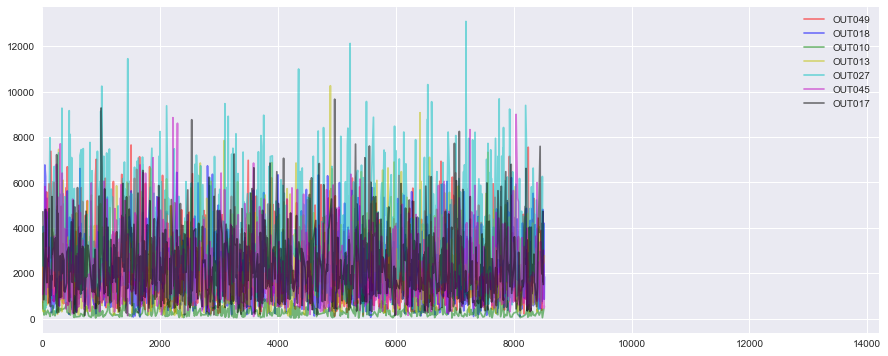

In [34]:
colors = ['r', 'b', 'g', 'y', 'c', 'm', 'k']

for i, s in enumerate(data.Outlet_Identifier.unique()[:7]):
    data[data.Outlet_Identifier == s].Item_Outlet_Sales.plot(c=colors[i], figsize=(15, 6), label=s, alpha=.5)

plt.legend(loc='best');

In [35]:
data.Outlet_Identifier.unique()

array(['OUT049', 'OUT018', 'OUT010', 'OUT013', 'OUT027', 'OUT045',
       'OUT017', 'OUT046', 'OUT035', 'OUT019'], dtype=object)

In [36]:
data_OUT049 = data[data.Outlet_Identifier == 'OUT049']
data_OUT018 = data[data.Outlet_Identifier == 'OUT018']
data_OUT010 = data[data.Outlet_Identifier == 'OUT010']
data_OUT013 = data[data.Outlet_Identifier == 'OUT013']
data_OUT027 = data[data.Outlet_Identifier == 'OUT027']
data_OUT045 = data[data.Outlet_Identifier == 'OUT045']
data_OUT017 = data[data.Outlet_Identifier == 'OUT017']
data_OUT035 = data[data.Outlet_Identifier == 'OUT035']
data_OUT019 = data[data.Outlet_Identifier == 'OUT019']
data_OUT046 = data[data.Outlet_Identifier == 'OUT046']

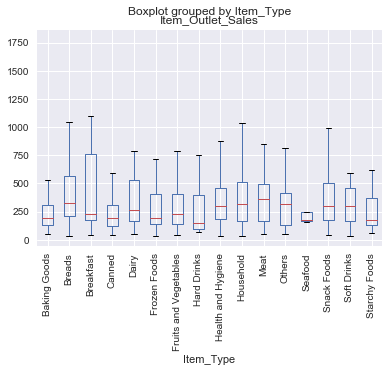

In [37]:
data_OUT010.boxplot(column='Item_Outlet_Sales', by='Item_Type')
plt.xticks(rotation=90);

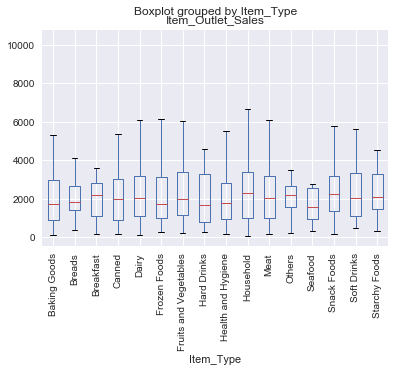

In [38]:
data_OUT013.boxplot(column='Item_Outlet_Sales', by='Item_Type')
plt.xticks(rotation=90);

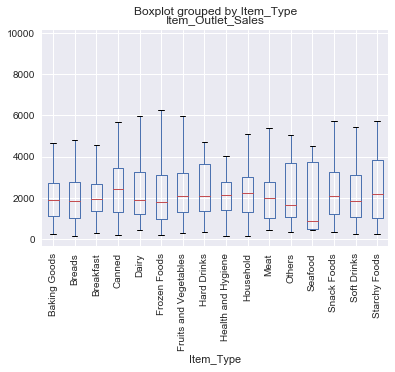

In [39]:
data_OUT017.boxplot(column='Item_Outlet_Sales', by='Item_Type')
plt.xticks(rotation=90);

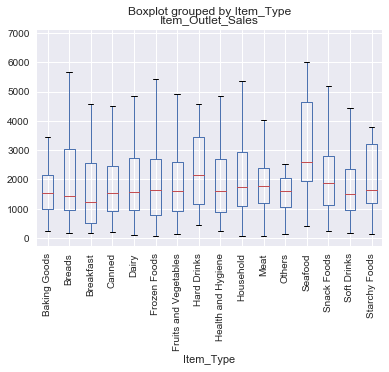

In [40]:
data_OUT018.boxplot(column='Item_Outlet_Sales', by='Item_Type')
plt.xticks(rotation=90);

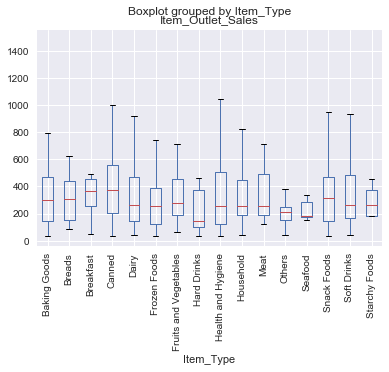

In [41]:
data_OUT019.boxplot(column='Item_Outlet_Sales', by='Item_Type')
plt.xticks(rotation=90);

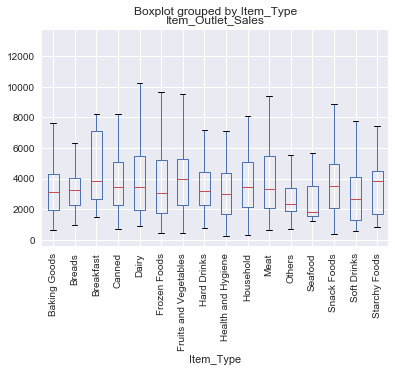

In [42]:
data_OUT027.boxplot(column='Item_Outlet_Sales', by='Item_Type')
plt.xticks(rotation=90);

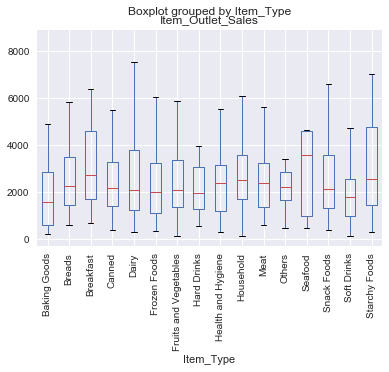

In [43]:
data_OUT035.boxplot(column='Item_Outlet_Sales', by='Item_Type')
plt.xticks(rotation=90);

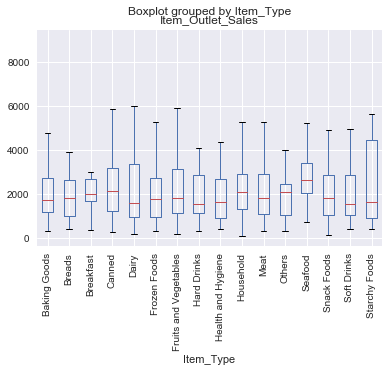

In [44]:
data_OUT045.boxplot(column='Item_Outlet_Sales', by='Item_Type')
plt.xticks(rotation=90);

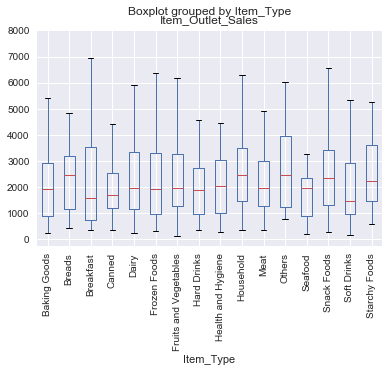

In [45]:
data_OUT049.boxplot(column='Item_Outlet_Sales', by='Item_Type')
plt.xticks(rotation=90);

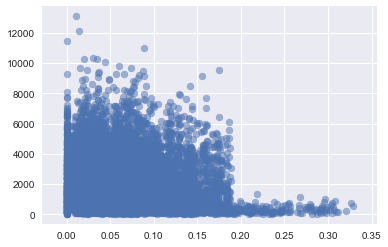

In [46]:
plt.scatter(data.Item_Visibility, data.Item_Outlet_Sales, alpha=.5);

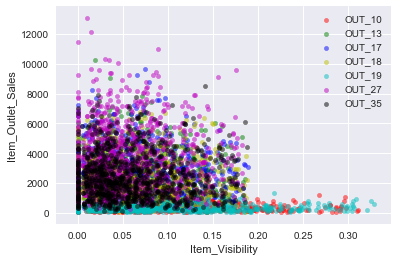

In [47]:
ax = data_OUT010.plot(kind='scatter', x = 'Item_Visibility', y = 'Item_Outlet_Sales', c='r', alpha=0.5, label='OUT_10')
data_OUT013.plot(kind='scatter', x = 'Item_Visibility', y = 'Item_Outlet_Sales', c='g', ax=ax, alpha=0.5, label='OUT_13')
data_OUT017.plot(kind='scatter', x = 'Item_Visibility', y = 'Item_Outlet_Sales', c='b', ax=ax, alpha=0.5, label='OUT_17')
data_OUT018.plot(kind='scatter', x = 'Item_Visibility', y = 'Item_Outlet_Sales', c='y', ax=ax, alpha=0.5, label='OUT_18')
data_OUT019.plot(kind='scatter', x = 'Item_Visibility', y = 'Item_Outlet_Sales', c='c', ax=ax, alpha=0.5, label='OUT_19')
data_OUT027.plot(kind='scatter', x = 'Item_Visibility', y = 'Item_Outlet_Sales', c='m', ax=ax, alpha=0.5, label='OUT_27')
data_OUT035.plot(kind='scatter', x = 'Item_Visibility', y = 'Item_Outlet_Sales', c='k', ax=ax, alpha=0.5, label='OUT_35')
plt.legend(loc='best');

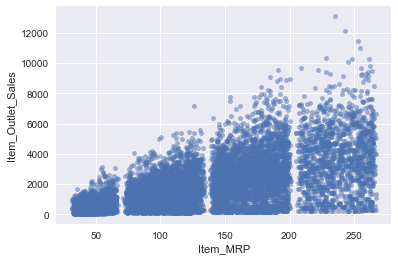

In [48]:
data.plot(kind='scatter', x = 'Item_MRP', y = 'Item_Outlet_Sales', alpha=.5);

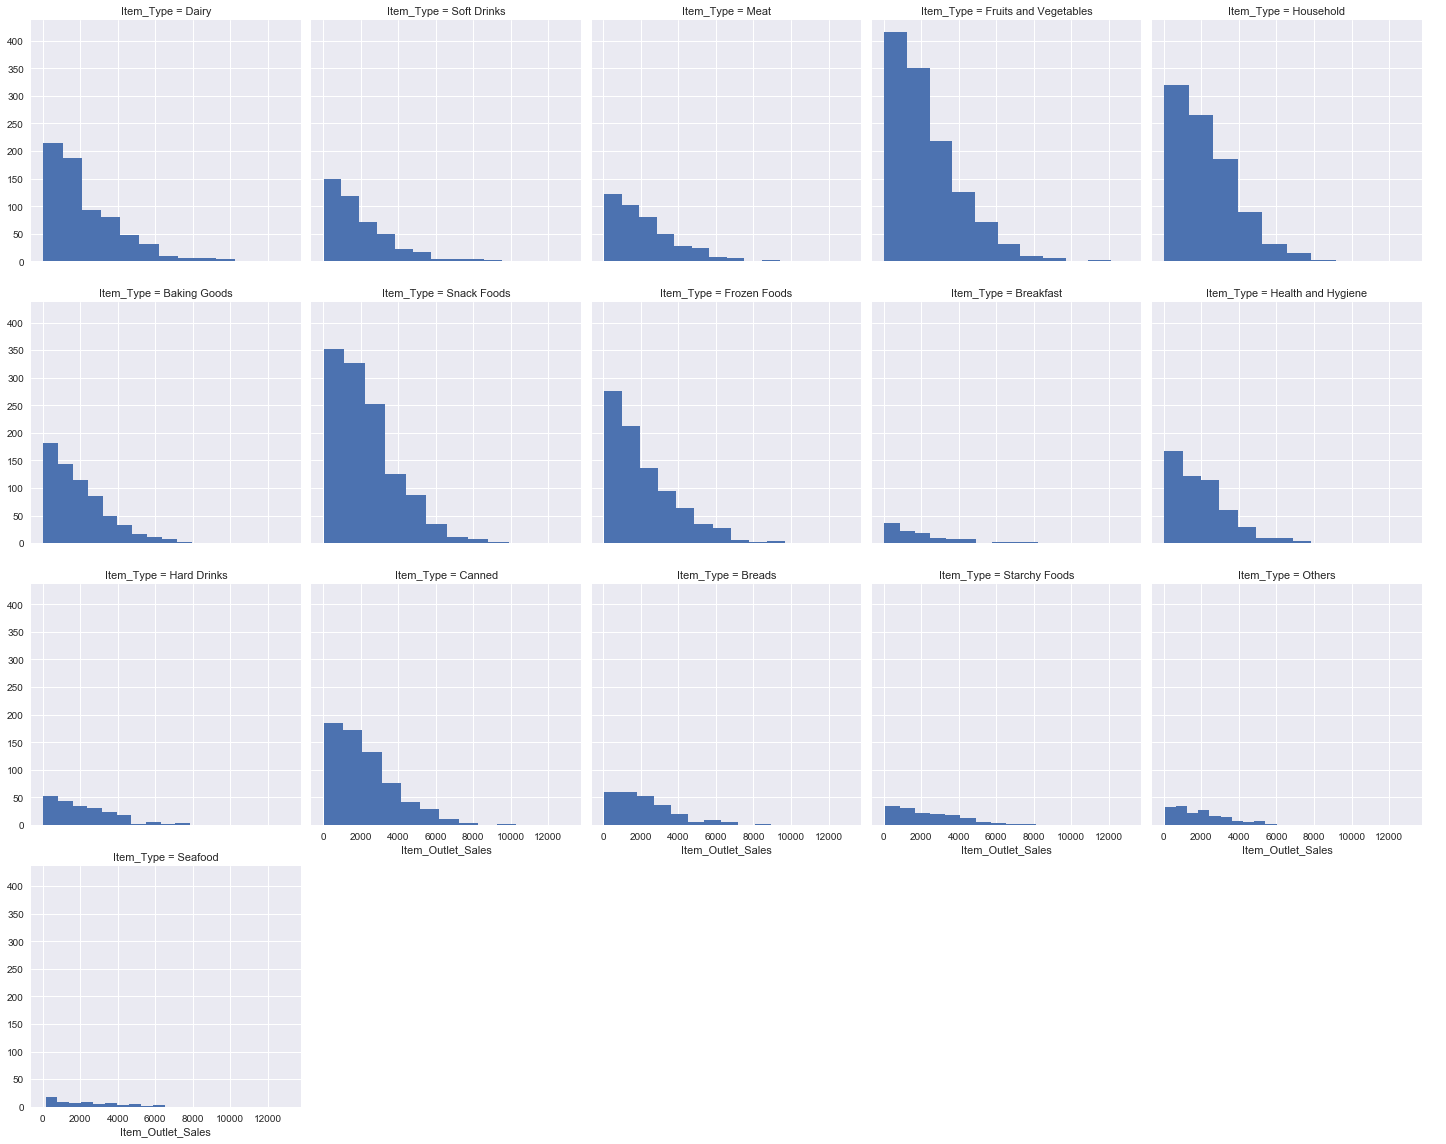

In [49]:
sns.FacetGrid(data, col='Item_Type', size=4, col_wrap=5).map(plt.hist, 'Item_Outlet_Sales').add_legend()